In [1]:
import numpy as np                                                                                                                 # Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt                                                                                                                           
import seaborn as sns

In [2]:
df = pd.read_csv('summer.csv')                                                                                                     # Reading the Dataset

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
df.shape                                                                                                                           # shape of the dataset

(31165, 9)

In [5]:
df.info()                                                                                                                          # Infrrmation about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [7]:
df.isnull().sum()                                                                                                                  # Finding null values in dataset

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

## **1. In how many cities Summer Olympics is held so far?**

In [8]:
len(df['City'].unique())                                                                                                           

22

## **2. Which sport is having most number of Gold Medals so far? (Top 5)**

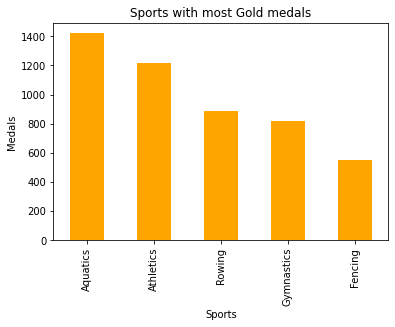

In [52]:
df_medal = df[df['Medal'] == 'Gold']                                                                                               # This shows that 'Aquatics' have most gold medal 
Gold_medal = df_medal['Sport'].value_counts().head()                                                                                
Gold_medal.plot.bar(x = 'Sport' , y = 'Medal',
                    xlabel = 'Sports' ,
                    ylabel = 'Medals',
                    title = 'Sports with most Gold medals',
                    color = 'orange')
                    

## **3. Which sport is having most number of medals so far? (Top 5)**

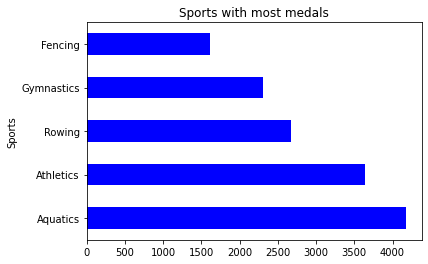

In [53]:
most_medal = df.groupby('Sport')['Medal'].count()                                                                                  # 'Aquatics' also have most number of medal
most_medal.sort_values(ascending = False).head().plot.barh(x = 'Sport' , y = 'Medal',
                                                 xlabel = 'Sports' ,
                                                 ylabel = 'Medals',
                                                 title = 'Sports with most medals',
                                                 color = 'blue')

## **4. Which player has won most number of medals? (Top 5)**

In [16]:
df = pd.concat([df,pd.get_dummies(df.Medal)] , axis = 1)                                                                           # here we are making differt colomns for types of medal
df['All_medal'] = df['All_medal'] = df['Bronze'] + df['Gold'] + df['Silver']

In [47]:
players = df.groupby( by = ['Athlete'], as_index=False).sum()
athlete = players.sort_values(by = 'All_medal' , ascending = False).head(5)
athlete.head(10)[['Athlete' ,'Bronze' , 'Gold' , 'Silver', 'All_medal']].sort_values(by = 'All_medal' , ascending = False)


,Athlete,Bronze,Gold,Silver,All_medal
15702,"PHELPS, Michael",2,18,2,22
11202,"LATYNINA, Larisa",4,9,5,18
511,"ANDRIANOV, Nikolay",3,7,5,15
12476,"MANGIAROTTI, Edoardo",2,6,5,13
14883,"ONO, Takashi",4,5,4,13


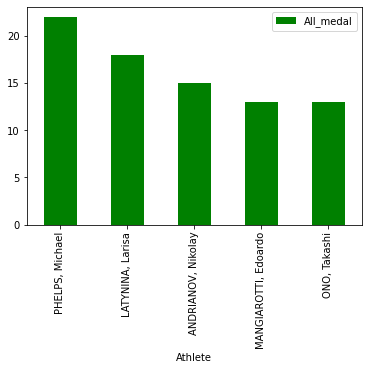

In [54]:
All_Medals = athlete.head(5)[['Athlete' , 'All_medal']].sort_values(by = 'All_medal' , ascending = False)
All_Medals.plot.bar(x = 'Athlete', color = 'green')

## **5. Which player has won most number Gold Medals of medals? (Top 5)**

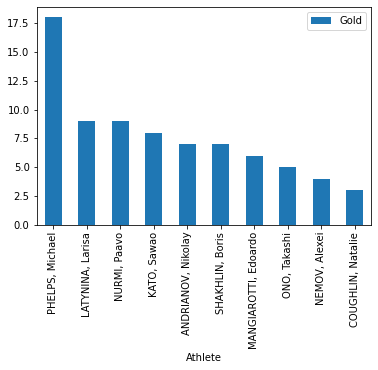

In [39]:
Gold_Medals = athlete.head(10)[['Athlete' , 'Gold']].sort_values(by = 'Gold' , ascending = False)
Gold_Medals.plot.bar(x = 'Athlete' )

## **6. In which year India won first Gold Medal in Summer Olympics?**

In [56]:
df[df['Country'] == 'IND'].sort_values( by = 'Year' ,  ascending = True).head()                                                    # This showe that India won its first gold medal in "1928"

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Bronze,Gold,Silver,All_medal
241,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M,Silver,0,0,1,1
244,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M Hurdles,Silver,0,0,1,1
5526,1928,Amsterdam,Hockey,Hockey,"YUSUF, Sayed Mohamed",IND,Men,Hockey,Gold,0,1,0,1
5525,1928,Amsterdam,Hockey,Hockey,"SINGH, Jaipal",IND,Men,Hockey,Gold,0,1,0,1
5524,1928,Amsterdam,Hockey,Hockey,"SHAUKAT, Ali",IND,Men,Hockey,Gold,0,1,0,1


## **7. Which event is most popular in terms on number of players?**

In [61]:
df['Event'].value_counts().head()

Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Event, dtype: int64

## **8. Which sport is having most female Gold Medalists?**

In [46]:
df_women = df[df['Gender'] == 'Women']
df_women_gold = df_women[df_women['Medal'] == 'Gold']
df_women_gold['Sport'].value_counts().head()

Aquatics    589
Name: Sport, dtype: int64